In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti

In [8]:
def mse(w,x,y):
    return (x @ w - y)**2

def mse_grad(w,x,y):
    print(w.shape)
    print(x.shape)
    print(y.shape)
    return 2 * x * (x @ w - y)

def reglog(w,x,y):
    sig = lambda x: 1 / (1 + np.exp(- x @ w ))
    return (sig(x) - y)**2

def reglog_grad(w,x,y):
    #a implémenter
    pass

def check_fonctions():
    ## On fixe la seed de l'aléatoire pour vérifier les fonctions
    np.random.seed(0)
    datax, datay = gen_arti(epsilon=0.1)
    wrandom = np.random.randn(datax.shape[1],1)
    assert(np.isclose(mse(wrandom,datax,datay).mean(),0.54731,rtol=1e-4)), mse(wrandom,datax,datay).mean()
    # assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4)), reglog(wrandom,datax,datay).mean()
    assert(np.isclose(mse_grad(wrandom,datax,datay).mean(),-1.43120,rtol=1e-4)), mse_grad(wrandom,datax,datay).mean()
    # assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4)), np.isclose(reglog_grad(wrandom,datax,datay).mean()
    np.random.seed()

check_fonctions()

(2, 1)
(1000, 2)
(1000, 1)


KeyboardInterrupt: 

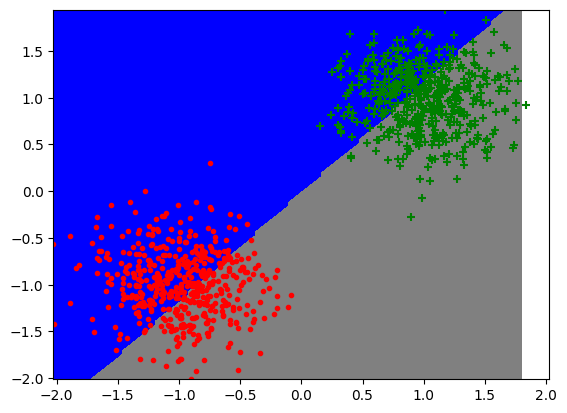

<Figure size 640x480 with 0 Axes>

In [9]:
## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
datax, datay = gen_arti(epsilon=0.1)
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w  = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)

# Descente de gradient

In [11]:
def descente_gradient(datax, datay, f_loss, f_grad, eps, iter=1000):
    w_old = np.random.random(size=(datax.shape[1],))
    # w_old = np.zeros(datax.shape[1])
    w_list = [w_old]
    loss_list = [f_loss(w_old, datax, datay)]
    for _ in range(iter):
        w = w_old - eps * f_grad(w_old, datax, datay).mean()
        w_list.append(w)
        if (w - w_old).sum() < eps :
            return w, w_list, loss_list
        w_old = w
        loss_list.append(f_loss(w, datax, datay).mean())
    else:
        print("non convergence")
        return w, w_list, loss_list
descente_gradient(datax, datay, mse, mse_grad, 1e-4)

(2,)
(1000, 2)
(1000, 1)


ValueError: operands could not be broadcast together with shapes (1000,2) (1000,1000) 